# 36 - Understanding Variability in Samples

**Key Idea:** Every sample is a little different. That's not an error — it's just the nature of randomness.

**Analogy:** If you grab a handful of jellybeans twice, you'll get slightly different color mixes. Doesn't mean something's wrong — just natural variation.

## Simple Example: Jellybean Handfuls

Imagine a jar with 1000 jellybeans (40% red, 30% blue, 20% green, 10% yellow). Let's grab 3 different handfuls of 50 jellybeans each and see how different they are.

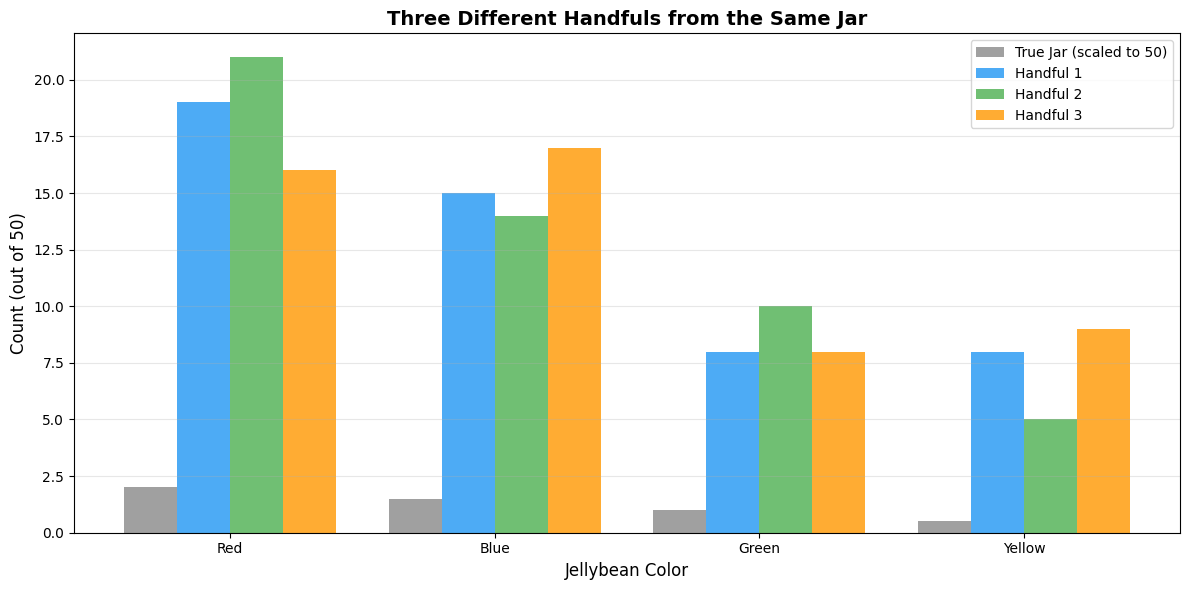


True Jar Proportions:
  Red: 2.0 (out of 50)
  Blue: 1.5 (out of 50)
  Green: 1.0 (out of 50)
  Yellow: 0.5 (out of 50)

Handful 1:
  Red: 19
  Blue: 15
  Green: 8
  Yellow: 8

Handful 2:
  Red: 21
  Blue: 14
  Green: 10
  Yellow: 5

Handful 3:
  Red: 16
  Blue: 17
  Green: 8
  Yellow: 9

→ All three handfuls are different, but all close to the true proportions!
→ This is SAMPLING VARIABILITY — it's natural and expected


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# TRUE population proportions in the jar
true_proportions = {
    'Red': 40,
    'Blue': 30,
    'Green': 20,
    'Yellow': 10
}

# Create jar with 1000 jellybeans
jar = np.array(['Red'] * 400 + ['Blue'] * 300 + ['Green'] * 200 + ['Yellow'] * 100)

# Take 3 different handfuls (samples) of 50 jellybeans
colors = ['Red', 'Blue', 'Green', 'Yellow']
handfuls = []
for i in range(3):
    handful = np.random.choice(jar, size=50, replace=False)
    handful_counts = [np.sum(handful == color) for color in colors]
    handfuls.append(handful_counts)

# Visualize
x = np.arange(len(colors))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# True proportions (scaled to 50)
true_counts = [true_proportions[c] / 1000 * 50 for c in colors]
ax.bar(x - 1.5*width, true_counts, width, label='True Jar (scaled to 50)', color='#424242', alpha=0.5)

# Three handfuls
ax.bar(x - 0.5*width, handfuls[0], width, label='Handful 1', color='#2196F3', alpha=0.8)
ax.bar(x + 0.5*width, handfuls[1], width, label='Handful 2', color='#4CAF50', alpha=0.8)
ax.bar(x + 1.5*width, handfuls[2], width, label='Handful 3', color='#FF9800', alpha=0.8)

ax.set_xlabel('Jellybean Color', fontsize=12)
ax.set_ylabel('Count (out of 50)', fontsize=12)
ax.set_title('Three Different Handfuls from the Same Jar', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(colors)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTrue Jar Proportions:")
for i, color in enumerate(colors):
    print(f"  {color}: {true_counts[i]:.1f} (out of 50)")

print("\nHandful 1:")
for i, color in enumerate(colors):
    print(f"  {color}: {handfuls[0][i]}")

print("\nHandful 2:")
for i, color in enumerate(colors):
    print(f"  {color}: {handfuls[1][i]}")

print("\nHandful 3:")
for i, color in enumerate(colors):
    print(f"  {color}: {handfuls[2][i]}")

print("\n→ All three handfuls are different, but all close to the true proportions!")
print("→ This is SAMPLING VARIABILITY — it's natural and expected")

## Real-World Example: Presidential Polling Variability

Two different polling companies survey 1,000 voters each about their preferred candidate. Both samples are from the same population (all voters), but they get slightly different results. This is NOT a contradiction — it's natural sampling variability!

**Key Insight:** The Central Limit Theorem tells us that larger samples have LESS variability. Let's see this in action.

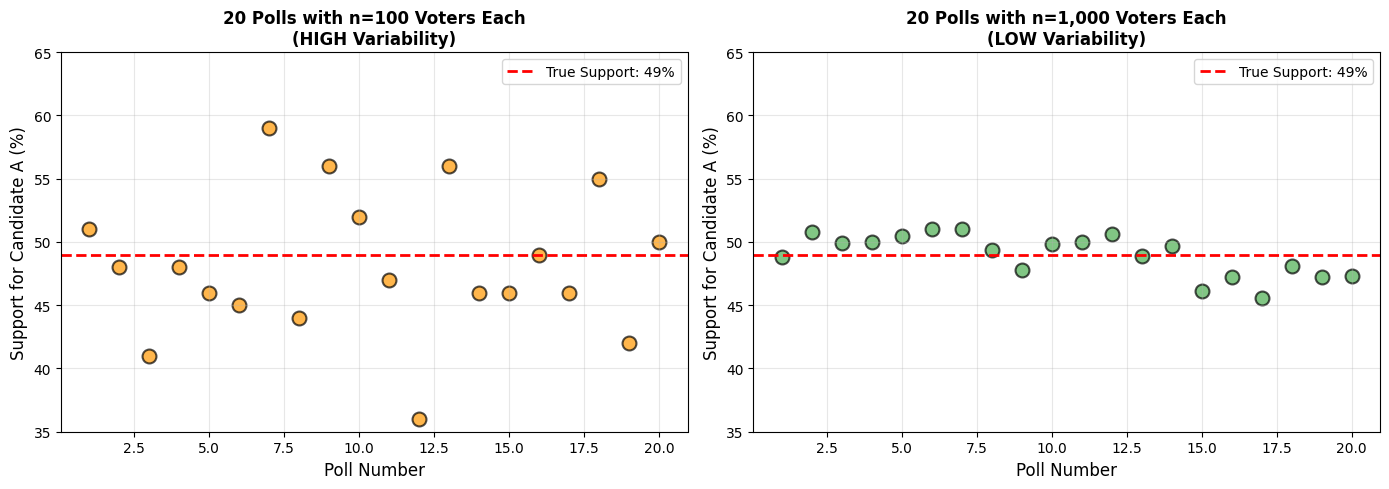


True Population Support: 49%

Small Polls (n=100):
  Range: 36.0% to 59.0%
  Standard Deviation: 5.47%

Large Polls (n=1,000):
  Range: 45.6% to 51.0%
  Standard Deviation: 1.61%

→ Larger samples = LESS variability = MORE reliable estimates!
→ Two polls showing 48% vs 50% is NOT a contradiction — just sampling variability
→ This is why poll sample size matters for predictive analytics!


In [2]:
# TRUE population: 49% support Candidate A
true_support = 0.49

np.random.seed(42)

# Simulate 20 different polls with SMALL samples (n=100)
small_polls = []
for i in range(20):
    votes = np.random.choice([1, 0], size=100, p=[true_support, 1-true_support])
    small_polls.append(np.mean(votes) * 100)

# Simulate 20 different polls with LARGE samples (n=1000)
large_polls = []
for i in range(20):
    votes = np.random.choice([1, 0], size=1000, p=[true_support, 1-true_support])
    large_polls.append(np.mean(votes) * 100)

# Visualize the variability
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Small sample polls
ax1.scatter(range(1, 21), small_polls, color='#FF9800', s=100, alpha=0.7, edgecolors='black', linewidth=1.5)
ax1.axhline(y=true_support * 100, color='red', linestyle='--', linewidth=2, label=f'True Support: {true_support*100:.0f}%')
ax1.set_xlabel('Poll Number', fontsize=12)
ax1.set_ylabel('Support for Candidate A (%)', fontsize=12)
ax1.set_title('20 Polls with n=100 Voters Each\n(HIGH Variability)', fontsize=12, fontweight='bold')
ax1.set_ylim(35, 65)
ax1.legend()
ax1.grid(alpha=0.3)

# Large sample polls
ax2.scatter(range(1, 21), large_polls, color='#4CAF50', s=100, alpha=0.7, edgecolors='black', linewidth=1.5)
ax2.axhline(y=true_support * 100, color='red', linestyle='--', linewidth=2, label=f'True Support: {true_support*100:.0f}%')
ax2.set_xlabel('Poll Number', fontsize=12)
ax2.set_ylabel('Support for Candidate A (%)', fontsize=12)
ax2.set_title('20 Polls with n=1,000 Voters Each\n(LOW Variability)', fontsize=12, fontweight='bold')
ax2.set_ylim(35, 65)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTrue Population Support: {true_support*100:.0f}%")
print(f"\nSmall Polls (n=100):")
print(f"  Range: {min(small_polls):.1f}% to {max(small_polls):.1f}%")
print(f"  Standard Deviation: {np.std(small_polls):.2f}%")

print(f"\nLarge Polls (n=1,000):")
print(f"  Range: {min(large_polls):.1f}% to {max(large_polls):.1f}%")
print(f"  Standard Deviation: {np.std(large_polls):.2f}%")

print("\n→ Larger samples = LESS variability = MORE reliable estimates!")
print("→ Two polls showing 48% vs 50% is NOT a contradiction — just sampling variability")
print("→ This is why poll sample size matters for predictive analytics!")

## Key Takeaways

**Sampling variability is natural and expected:**
- Different samples from the same population will give different results
- This doesn't mean something is wrong — it's just randomness
- **Larger samples** → Less variability → More reliable predictions
- The **Central Limit Theorem** explains why sample means cluster around the true population mean

**Real-world impact:**
- Two polls can show 48% vs 50% — both could be accurate reflections of sampling variability
- This is why margin of error exists (±3% is typical for n=1000)
- In predictive analytics, understanding sampling variability helps us interpret model predictions with appropriate confidence intervals